# Cosmology Homework 2
Note: Adapted directly from the `2_distances.ipynb` notebook

In [1]:
import astropy.units as u
import numpy as np
import pylab as plt
from sympy import *
from scipy import integrate
%matplotlib inline

In [2]:
#cosmological parameters
h = 0.7
OmegaM = 0.3
OmegaR = 0.0
OmegaL = 1 - OmegaM  #assumes flat

lightspeed = 3e5 * u.km/u.s

#Hubble function
def Hz(z):
    return 100*h* ( 
        OmegaM*(1+z)**3 + 
        OmegaR*(1+z)**4 +
        OmegaL + 
        (1 - OmegaM - OmegaL - OmegaR)*(1+z)**2 )**.5

#conformal distance
def Dconf(z):
    return Dconf_numerical(zinitial=np.zeros_like(z), zfinal=z)

def Dconf_numerical(zinitial, zfinal, divmax=20):
    return lightspeed * np.array([
        integrate.romberg(dConfDistdz, zii, zfi, divmax=divmax) 
        for (zii, zfi) in zip(zinitial,zfinal)]) * (u.Mpc * u.s / u.km)

def dConfDistdz(z):
    return 1.0 / Hz(z)

#angular diameter distance
def DA(z):
    return Dconf(z)/(1+z)

def DL(z):
    return Dconf(z)*(1+z)

from astropy.coordinates import Angle
# angle subtended via angular diameter distance
def AngleSize(z, length):
    # Since DA = l/theta => theta = l/DA 
    return Angle( (length / DA(z)) * u.rad, unit=u.arcsec)

# Problem 1
We get a minimum angular size at some redshift because there are two competing effects. An object far away is smaller, but also an object that subtends some large amount of the universe will be bigger. As you go back these competing effects balance at some point. At this critical redshift (or time) going back in time a little bit means when observed from present day earth the 1kpc object is in a smaller universe and takes a larger observation angle. At the same time that object is moving further away and is therefore smaller. At the critical redshift these two effects are the same size; however, as you go further back in time the effect of expansion on the angle becomes the larger effect by far.

Values for parts a, b, and c are all printed below


Minimum angular size of 0.118 arcsec achieved at redshift z=1.602


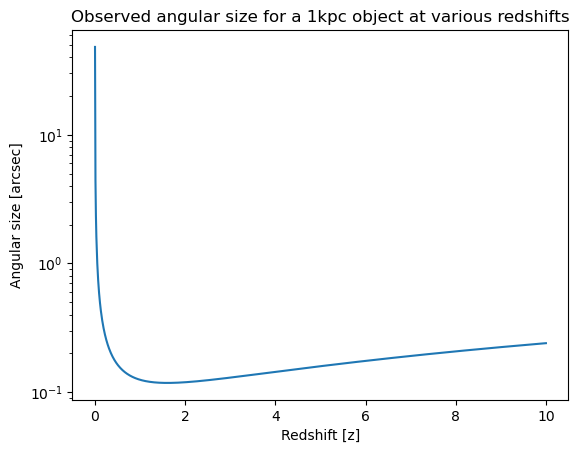

In [3]:
redshift = np.linspace(0.001, 10, num=1000)
angular_size = AngleSize(redshift, 1* u.kpc).to(u.arcsec)

fig, ax = plt.subplots(1,1)
ax.plot(redshift, angular_size)
ax.set_title("Observed angular size for a 1kpc object at various redshifts")
ax.set_xlabel("Redshift [z]")
ax.set_ylabel("Angular size [arcsec]")
ax.set_yscale("log")

print(f"Minimum angular size of {np.min(angular_size):.3} achieved at redshift z={redshift[np.argmin(angular_size)]:.4}")

Comoving distance at z=1000.0 is 13.67 Gpc


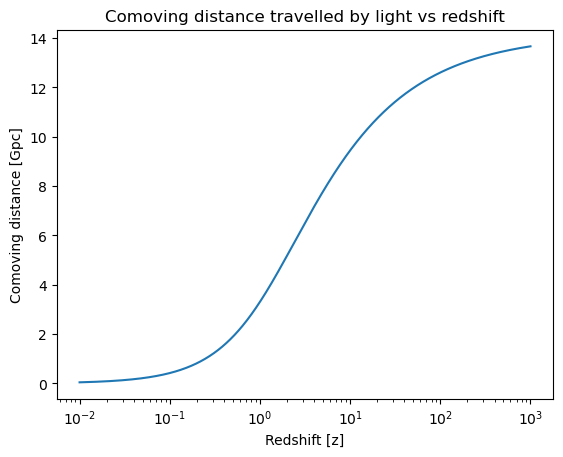

In [4]:
redshift = np.logspace(-2, 3, num=1000, base=10)
comoving_distance = Dconf(redshift).to(u.Gpc)

fig, ax = plt.subplots(1,1)
ax.plot(redshift, comoving_distance)
ax.set_title("Comoving distance travelled by light vs redshift")
ax.set_xlabel("Redshift [z]")
ax.set_xscale("log")
ax.set_ylabel("Comoving distance [Gpc]")

print(f"Comoving distance at z={redshift[-1]:.5} is {comoving_distance[-1]:.4}")

In [5]:
# Versions of our Hz and conformal distance formulas that are
# More cromulent with symbolic calculations
import sympy
def Hz_sym(z):
    h = 70
    OmegaM = Rational(3, 10)
    OmegaL = 1 - OmegaM
    # Not doing radiation and curvature because we don't need it
    return h*sympy.sqrt(OmegaM * (1+z)**3 + OmegaL) 

def Dconf_sym(zinitial, zfinal):
    z = Symbol("z")
    lightspeed = 3 * 10**5 # km/s
    return lightspeed*sympy.integrate(1.0/Hz_sym(z),(z, zinitial, zfinal))

horizon_size_past = Dconf_sym(1000,sympy.oo).evalf() * u.Mpc
horizon_distance = (comoving_distance[-1]).to(u.Mpc)
print(f"Distance to comoving horizon: {horizon_distance.to(u.Gpc):.3}")
print(f"Size of the Comoving horizon at z=1000: {horizon_size_past:.5}")
print(f"""Angle subtended by the Comoving horizon at z=1000 is {
    Angle(horizon_size_past/horizon_distance * u.rad, u.deg):.4}""")

Distance to comoving horizon: 13.7 Gpc
Size of the Comoving horizon at z=1000: 494.62 Mpc
Angle subtended by the Comoving horizon at z=1000 is 2.073 deg


Like I was mentioning in class, it would be neat to look at this visual size of a horizon not just on the CMB, but also thinking about just any redshift.

I've plotted below the angular size of such a causal horizon in the sky at various redshifts. The small angle approximation breaks down as you get sooner, but past about z=2, the two halves of the sky aren't in causal contact anymore, and at z=10 the horizon is a 30 degree radius circle in our sky.

In [16]:
# Note this takes a couple minutes to run
redshift = np.logspace(0, 3, num=200, base=10)
horizon_size = np.array([Dconf_sym(z, sympy.oo).evalf() for z in redshift]) * u.Mpc

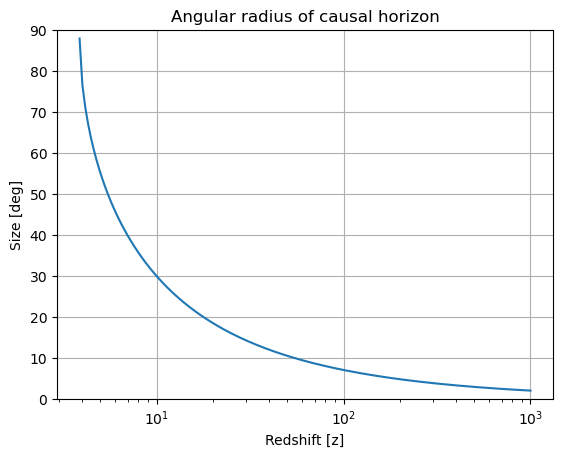

In [17]:
comoving_distance = Dconf(redshift).to(u.Mpc)
angular_size = np.arcsin(horizon_size/comoving_distance)

fig, ax = plt.subplots(1,1)
ax.plot(redshift, angular_size.to(u.deg))
ax.set_title("Angular radius of causal horizon")
ax.set_xlabel("Redshift [z]")
ax.set_xscale("log")
ax.set_ylabel("Size [deg]")
ax.set_ylim(0,90)
ax.grid(True)

# Problem 2
Reproduce the diagram !

I had fun with this and tracked down the [original diagram](https://astro.ucla.edu/~wright/sne_cosmology.html) and the [original paper](https://arxiv.org/pdf/1401.4064.pdf). There's a little conversion needed to get it ship-shape for the plot.

In [8]:
# Original paper: https://arxiv.org/pdf/1401.4064.pdf
# From Table F.1
z_data = np.array([
    0.010, 0.012, 0.014, 0.016, 0.019, 0.023, 0.026, 0.031, 0.037, 0.043, 
    0.051, 0.060, 0.070, 0.082, 0.097, 0.114, 0.134, 0.158, 0.186, 0.218, 
    0.257, 0.302, 0.355, 0.418, 0.491, 0.578, 0.679, 0.799, 0.940, 1.105, 
    1.300])
u_b_data = np.array([
    32.9538, 33.8790, 33.8421, 34.1185, 34.5934, 34.9390, 35.2520, 35.7485, 36.0697, 36.4345,
    36.6511, 37.1580, 37.4301, 37.9566, 38.2532, 38.6128, 39.0678, 39.3414, 39.7921, 40.1565,
    40.5649, 40.9052, 41.4214, 41.7909, 42.2314, 42.6170, 43.0527, 43.5041, 43.9725, 44.5140, 
    44.8218])
# From Table F.2 Diagonals of the covariance matrix are the error squared
u_b_err_data = np.sqrt( np.array([
    21282, 28155, 6162, 5235, 7303, 3150, 3729, 3222, 3225, 5646, 
    8630,  3855,  4340, 2986, 3592, 1401, 1491, 1203, 1032, 1086, 
    1006,  1541,  1127, 1723, 1550, 1292, 3941, 2980, 4465, 23902, 
    19169
]) * 10**(-6) )

# Get from z to c*z
cz_data = lightspeed * z_data

# Get from distance modulus u_b to distances
dist_data = 10**(1 + u_b_data/5) * u.pc

# Derivative of distance above times the error to find error bars
dist_err_data = np.log(10)/5 * 10**(1 + u_b_data/5) * u_b_err_data * u.pc

Next I'm plotting each of these universes. I ran into some issues exactly matching the diagram, see comments

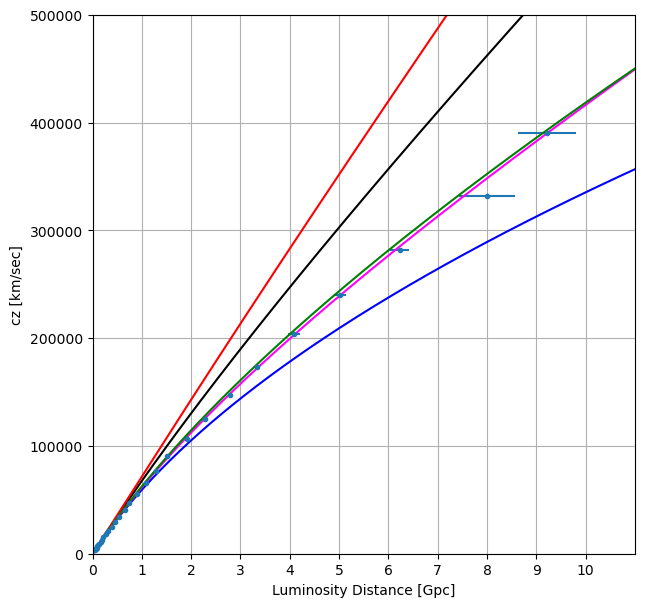

In [9]:
fig, ax = plt.subplots(1,1)
fig.set_figwidth(7)
fig.set_figheight(7)
ax.set_xlim(0,11)
ax.set_ylim(0,500000)
ax.set_xlabel("Luminosity Distance [Gpc]")
ax.set_ylabel("cz [km/sec]")
ax.grid(True)
ax.set_xticks(np.arange(0,11,1))
# Plot the data with error bars
ax.errorbar(dist_data.to(u.Gpc), cz_data, xerr = dist_err_data.to(u.Gpc), fmt = '.')

redshift = np.linspace(0, 2, num=1000)

def plot_universe(ax, redshift, **kwargs):
    luminosity_distance = DL(redshift).to(u.Gpc)
    ax.plot(luminosity_distance, redshift*lightspeed, **kwargs)

h = 0.71
OmegaR = 0
# EdS universe (only matter) 
OmegaM = 1
OmegaL = 1 - OmegaM  #assumes flat
plot_universe(ax, redshift, color="black")

# dS universe (only cosmological constant)
OmegaM = 0
OmegaL = 1 - OmegaM  #assumes flat
plot_universe(ax, redshift, color="blue")

# Flat Dark Energy Model
OmegaM = 0.27
OmegaL = 0.73  #assumes flat
plot_universe(ax, redshift, color="magenta")

# These two don't match the parameters in the problem

# Closed matter only
#
# "Closed Matter only" says matter only only on the plot
# In the original text it's just "A closed universe" with Omega = 2
# Setting OmegaR to 0.3 seems to put the line in the right place
OmegaM = 1.7  # Ideally 2.0 for matter only
OmegaL = 0.0
OmegaR = 0.3  # Ideally 0.0 for matter only
plot_universe(ax, redshift, color="red")

# Empty Universe
# Without OmegaL=0.4 it is in very much the wrong place on the diagram
# It still looks like its not separated enough from our universe in this view
# Something still may be wrong, or the Friedman equation Ned Wright used here
# May have a different form.
OmegaM = 0
OmegaL = 0.4  # Ideally 0.0 so we are empty of cosmological constant as well
OmegaR = 0
plot_universe(ax, redshift, color="green")

# Put these ugly global variables back to their correct values!
h = 0.7
OmegaM = 0.3
OmegaR = 0.0
OmegaL = 1- OmegaM  #assumes flat
